In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('loan_sanction_train.csv')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train.dropna(inplace = True)

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [ ]:
train.groupby('Gender')['Loan_Status'].value_counts()/train.groupby('Gender')['Loan_Status'].count()*100

Gender  Loan_Status
Female  Y              62.790698
        N              37.209302
Male    Y              70.558376
        N              29.441624
dtype: float64

In [ ]:
pivot = pd.pivot_table(data = train,
                       index = ['Gender', 'Married'],
                       columns = 'Loan_Status',
                       values = 'Loan_ID',
                       aggfunc = 'count',
                       margins = True,
                       margins_name = 'Total')
pivot['percentage of N'] = pivot['N']/pivot['Total']*100
pivot

Loan_Status       N    Y  Total  percentage of N
Gender Married                                  
Female No        24   37     61        39.344262
       Yes        8   17     25        32.000000
Male   No        40   68    108        37.037037
       Yes       76  210    286        26.573427
Total           148  332    480        30.833333

In [ ]:
train['LoanAmountGrouped'] = pd.cut(train['LoanAmount'], 5)
pivot = pd.pivot_table(data = train,
               index = 'LoanAmountGrouped',
               columns = 'Loan_Status',
               values = 'Loan_ID',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total')
pivot['percentage of N'] = pivot['N']/pivot['Total']*100
pivot

<ipython-input-78-fb65a988171c>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(data = train,


Loan_Status,N,Y,Total,percentage of N
LoanAmountGrouped,,,,
"(8.409, 127.2]",73,163,236,30.932203
"(127.2, 245.4]",58,144,202,28.712871
"(245.4, 363.6]",12,18,30,40.000000
"(363.6, 481.8]",2,4,6,33.333333
"(481.8, 600.0]",3,3,6,50.000000
Total,148,332,480,30.833333


<Axes: xlabel='TotalIncome', ylabel='LoanAmount'>

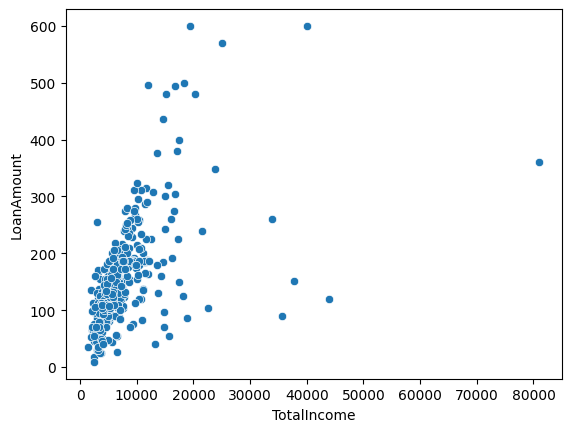

In [ ]:
import seaborn as sns
train['TotalIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']
sns.scatterplot(data = train, x = 'TotalIncome', y = 'LoanAmount')

In [ ]:
(train['TotalIncome']/train['LoanAmount']).mean()

52.105992108767786

In [ ]:
train = pd.read_csv('loan_sanction_train.csv')
test = pd.read_csv('loan_sanction_test.csv')

In [ ]:
train.dropna(inplace = True)
dict = {'Y':1,
        'N':0}
train['Loan_Status'] = train['Loan_Status'].map(dict)
train.drop(columns = 'Loan_ID', inplace = True)
train = pd.get_dummies(data = train)

In [ ]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,...,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,1,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,1,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = 'Loan_Status'),
                                                    train['Loan_Status'],
                                                    test_size = 0.33,
                                                    stratify = train['Loan_Status'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
dummy = DummyClassifier(strategy="most_frequent")
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
dummy.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
pred_knc = knc.predict(X_test)
pred_dummy = dummy.predict(X_test)
print("Accuracy dtc: ", accuracy_score(y_test, pred_dtc))
print("Accuracy knc: ", accuracy_score(y_test, pred_knc))
print("Accuracy dummy: ", accuracy_score(y_test, pred_dummy))

Accuracy dtc:  0.6918238993710691
Accuracy knc:  0.6540880503144654
Accuracy dummy:  0.6918238993710691


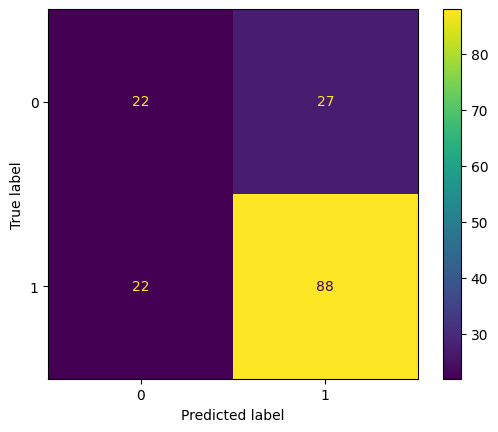

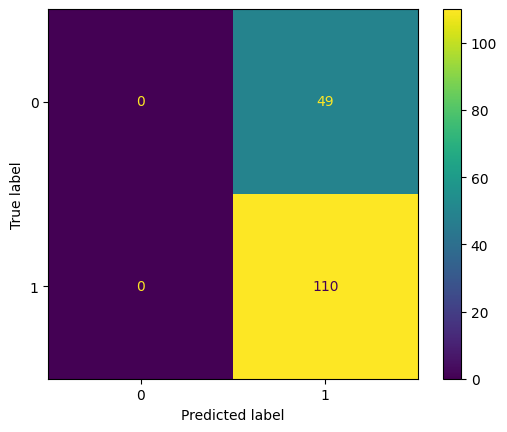

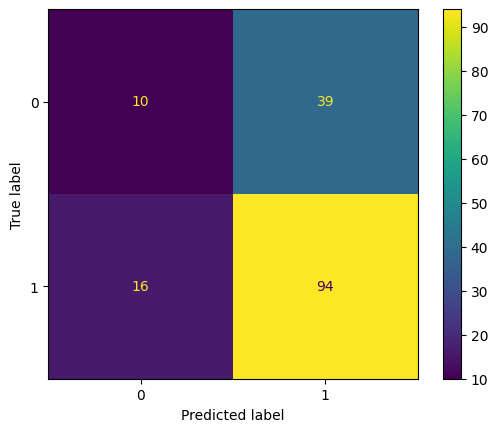

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_dtc = confusion_matrix(y_test, pred_dtc)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc)
cm_knc = confusion_matrix(y_test, pred_knc)
disp_knc = ConfusionMatrixDisplay(confusion_matrix=cm_knc)
cm_dummy = confusion_matrix(y_test, pred_dummy)
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy)
disp_dtc.plot()
disp_dummy.plot()
disp_knc.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
print("Accuracy dtc: ", cross_val_score(DecisionTreeClassifier(),
                                        train.drop(columns = 'Loan_Status'),
                                        train['Loan_Status'],
                                        cv = 10).mean())
print("Accuracy knc: ", cross_val_score(KNeighborsClassifier(),
                                        train.drop(columns = 'Loan_Status'),
                                        train['Loan_Status'],
                                        cv = 10).mean())
print("Accuracy dummy: ", cross_val_score(DummyClassifier(strategy = 'most_frequent'),
                                        train.drop(columns = 'Loan_Status'),
                                        train['Loan_Status'],
                                        cv = 10).mean())


Accuracy dtc:  0.7208333333333333
Accuracy knc:  0.6479166666666666
Accuracy dummy:  0.6916666666666667


In [ ]:
knc.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[6,7,8,10],
              'weights':['uniform', 'distance']}
clf = GridSearchCV(knc, parameters)
clf.fit(X_train, y_train)
pred_clf = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred_clf))

0.6540880503144654


In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import demographic_parity_ratio

In [ ]:
demographic_parity_ratio(y_test, pred_dtc, sensitive_features=X_test['Gender_Male'])

0.8172043010752689

In [ ]:
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
538,2917,536.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,True,False,False
315,3399,1640.0,111.0,180.0,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
480,4350,0.0,154.0,360.0,1.0,True,False,True,False,True,False,False,False,False,True,True,False,True,False,False
146,14866,0.0,70.0,360.0,1.0,True,False,False,True,False,False,True,False,True,False,True,False,False,False,True
602,5703,0.0,128.0,360.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,10513,3850.0,160.0,180.0,0.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
328,4333,2451.0,110.0,360.0,1.0,True,False,False,True,True,False,False,False,True,False,True,False,False,False,True
60,2500,3796.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True
557,10139,0.0,260.0,360.0,1.0,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False


In [ ]:
train_no_gender = train.drop(columns = ['Gender_Male', 'Gender_Female'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(train_no_gender.drop(columns = ['Loan_Status']),
                                                                    train_no_gender['Loan_Status'],
                                                                    test_size = 0.33,
                                                                    stratify = train_no_gender['Loan_Status'])

In [ ]:
dtc.fit(X_train_new, y_train_new)
pred_dtc_new = dtc.predict(X_test_new)
print(accuracy_score(y_test_new, pred_dtc_new))

0.6792452830188679


In [ ]:
train_no_gender_married = train.drop(columns = ['Gender_Male', 'Gender_Female', 'Married_No',	'Married_Yes'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(train_no_gender_married.drop(columns = ['Loan_Status']),
                                                                    train_no_gender_married['Loan_Status'],
                                                                    test_size = 0.33,
                                                                    stratify = train_no_gender_married['Loan_Status'])
dtc.fit(X_train_new, y_train_new)
pred_dtc_new = dtc.predict(X_test_new)
print(accuracy_score(y_test_new, pred_dtc_new))

0.6855345911949685


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

train = pd.read_csv('loan_sanction_train.csv')
train.drop(columns = 'Loan_ID', inplace = True)
train['Loan_Status'].map(dict)

categorical_cols = ['Gender', 'Married', 'Education', 'Property_Area', 'Dependents', 'Self_Employed']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

coltran_loanamount = Pipeline(steps = [('num_imputer', SimpleImputer(strategy='mean')),
                                                       ('kbins', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))])

coltran_categorical = Pipeline(steps = [('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                        ('oe', OneHotEncoder())])

coltran = ColumnTransformer(transformers = [('cat', coltran_categorical, categorical_cols),
                                            ('num_imputer', SimpleImputer(strategy='mean'), numerical_cols),
                                            ('loanamount', coltran_loanamount, ['LoanAmount'])],
                            remainder = 'passthrough')
pipe = Pipeline(steps = [('coltran', coltran),
                         ('norm', Normalizer()),
                         ('kbest', SelectKBest(f_classif)),
                         ('knc', knc)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['Loan_Status']),
                                                    train['Loan_Status'],
                                                    test_size = 0.33,
                                                    stratify = train['Loan_Status'])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Property_Area',
                                                   'Dependents',
                                                   'Self_Employed']),
                                                 ('num_imputer',
                                                  SimpleImputer(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('loanamount',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('kbins',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['LoanAmount'])])),
                ('norm', Normalizer()), ('kbest', SelectKBest()),
                ('knc', KNeighborsClassifier())])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

train = pd.read_csv('loan_sanction_train.csv')
train.drop(columns = 'Loan_ID', inplace = True)
train['Loan_Status'].map(dict)

categorical_cols = ['Gender', 'Married', 'Education', 'Property_Area', 'Dependents', 'Self_Employed']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputazione per categoriche
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codifica categorica
])

# Trasformazioni per le colonne numeriche
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputazione per numeriche
    ('normalizer', Normalizer())  # Normalizzazione per numeriche
])

# Trasformazione specifica per LoanAmount
loanamount_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputazione per LoanAmount
    ('kbins', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))  # Discretizzazione LoanAmount
])

# ColumnTransformer che unisce le trasformazioni
coltran = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_cols),
    ('num', num_transformer, numerical_cols),
    ('loanamount', loanamount_transformer, ['LoanAmount'])
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('coltran', coltran),  # Trasformazioni iniziali
    ('kbest', SelectKBest(score_func=f_classif, k=5)),  # Selezione delle migliori feature
    ('knc', KNeighborsClassifier(n_neighbors=5))  # Classificatore finale
])

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
accuracy_score(y_test, pipe.predict(X_test))

0.6945812807881774